<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/Analysis_of_housing_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Obtaining a dataset

pd.read_csv()and store it in a variable.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('train.csv')


[Problem 2] Investigation of the dataset itself

Please explain what kind of dataset it is while reading Kaggle's Overview page and "Data fields" on the Data page.

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# This database shows the details that affect the price of the house.

[Question 3] Confirmation of data

I will check the data. Please report a combination of code and markdown.

- See what each feature looks like. (numeric data, character data, etc.)
- Check which column is the target variable this time.
- Display the mean value, standard deviation, and quartile of the feature value at once.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
SalePrice_mean = df.loc[:, "SalePrice"].mean()
SalePrice_mean

180921.19589041095

[Question 4] Dealing with missing values

Do the following for missing values ​​and report them:

Check the presence or absence of missing values ​​for each feature value.
missingnoUse this library to check for missing values . This library allows you to visualize the presence or absence of missing values. Please see the following page for installation and usage.

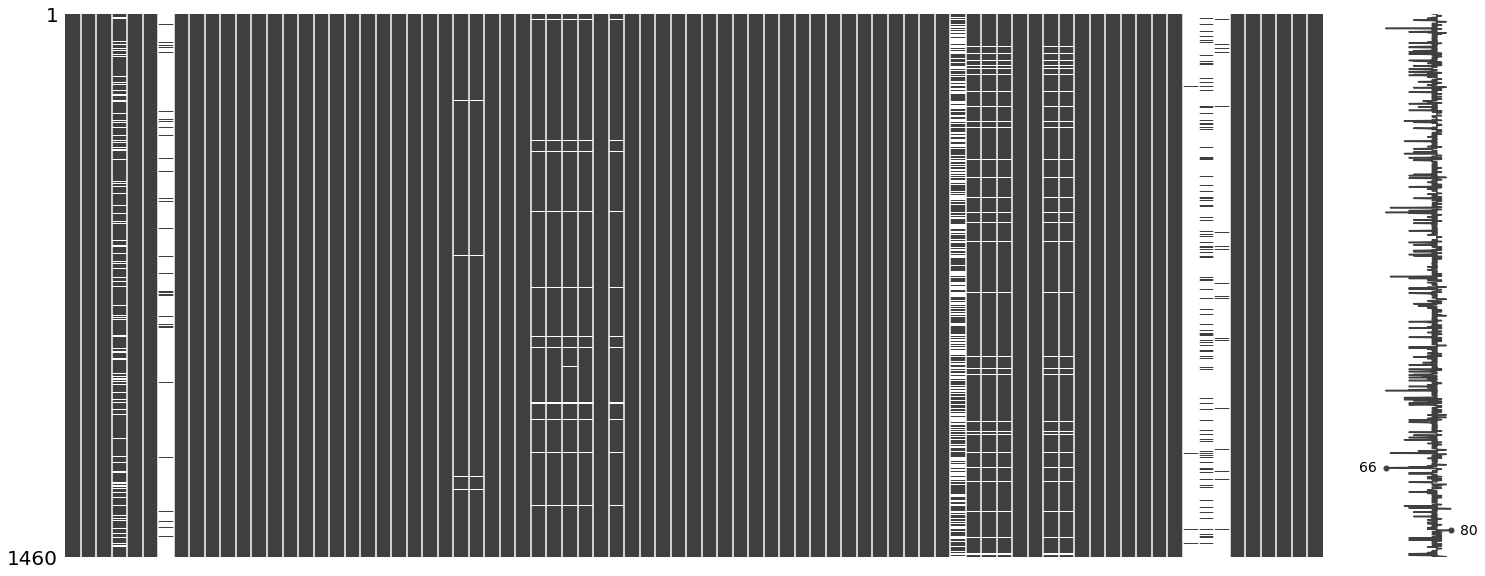

In [8]:
import missingno as msno
%matplotlib inline

msno.matrix(df)

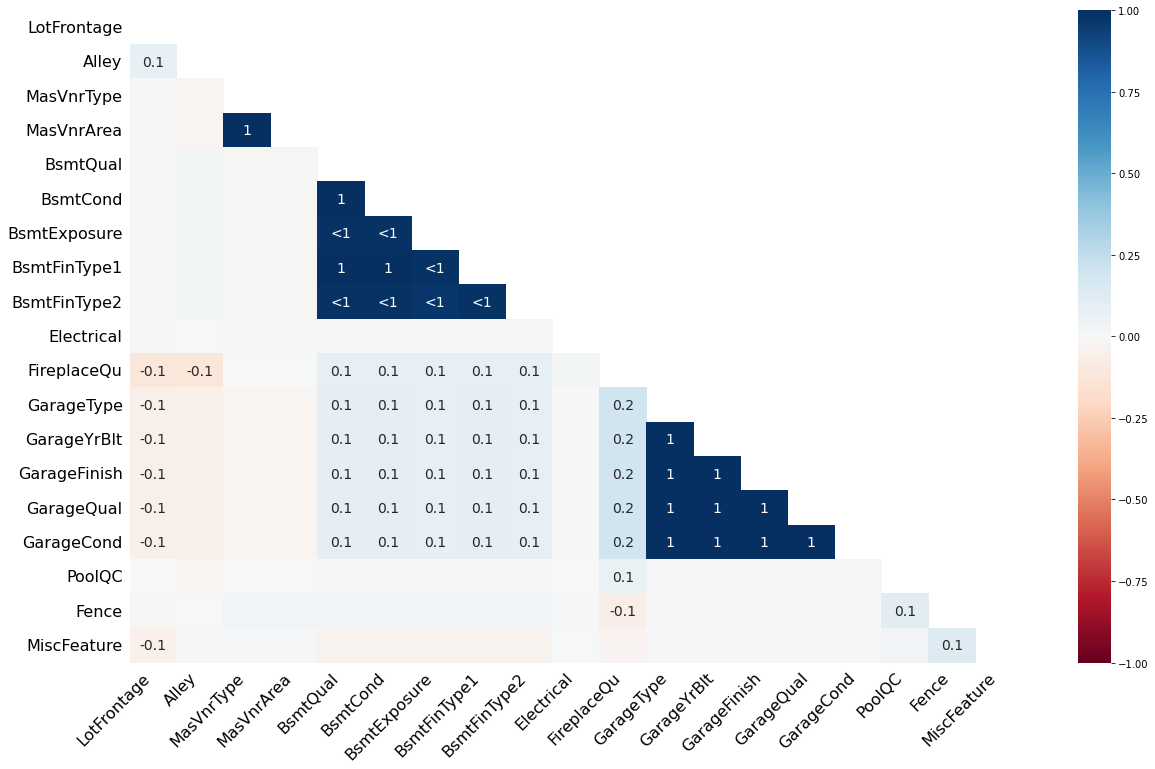

In [15]:
msno.heatmap(df)

[Problem 5] Terminology research
You need to know two words: Please research and collect these.

- kurtosis
- Skew

In [24]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
#skewness is way to measure the shape of distribution. that is used to estimate the asymmetrical behavior.
# Skewness = 0: Then normally distributed.
# Skewness > 0: Then more weight in the left tail of the distribution.
# Skewness < 0: Then more weight in the right tail of the distribution.
print("Kurtosis: %f" % df['SalePrice'].kurt())
#kurtosis is a statistical term and an important characteristic of frequency distribution.
# kurtosis for normal distribution is equal to 3.
# For a distribution having kurtosis < 3: It is called playkurtic.
# For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

Skewness: 1.882876
Kurtosis: 6.536282


[Question 6] Confirmation of distribution

- Use sns.displot()seaborn 's Ya sns.histplot()to display the distribution of the target variable, and also calculate "kurtosis" and "skewness".
- Perform logarithmic transformation on the objective variable.
- The distribution is displayed for the logarithmically transformed data, and "kurtosis" and "skewness" are also calculated.

Describe the change before and after logarithmic transformation, including the term "normal distribution". By processing in this way, the accuracy of prediction can be improved.

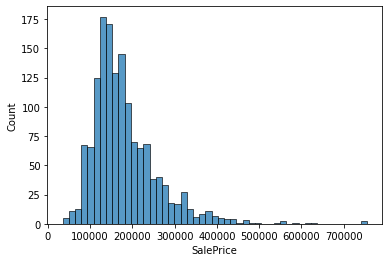

In [28]:
sns.histplot(df['SalePrice']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


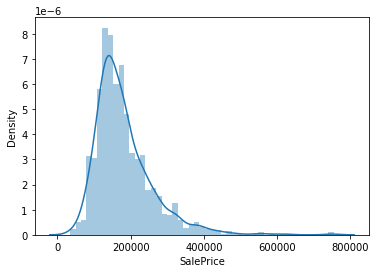

In [26]:
sns.distplot(df['SalePrice']);

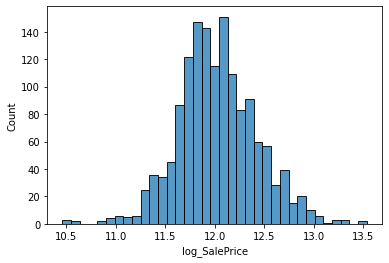

In [33]:
df['log_SalePrice'] = np.log(df['SalePrice'])
sns.histplot(df['log_SalePrice']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


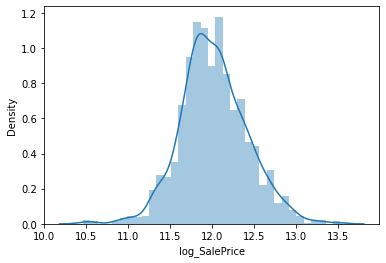

In [34]:
sns.distplot(df['log_SalePrice']);

In [35]:
print("Skewness: %f" % df['log_SalePrice'].skew())
print("Kurtosis: %f" % df['log_SalePrice'].kurt())


Skewness: 0.121335
Kurtosis: 0.809532


[Question 7] Check the correlation coefficient

We will check the features. Write an explanation or consideration for each in Markdown.

- Create a heat map of the correlation coefficient matrix and find relationships with high correlation coefficients.
- Select 10 features that are highly correlated with the target variable, and create a correlation coefficient matrix heat map for just these.
- Summarize in Japanese what the selected 10 features represent by referring to the description of Kaggle's DataDescription.
- Among the 10 selected features, three combinations with high mutual correlation coefficients are found.
"supplement"

When making predictions using multiple regression analysis, etc., a combination of features that are highly correlated may adversely affect the prediction. A simple way to deal with this situation is to find such a set of features and narrow it down to one.

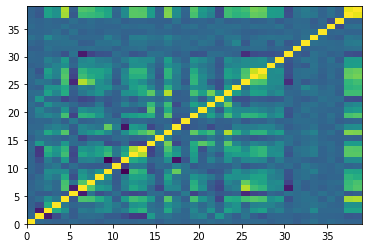

In [36]:
import matplotlib.pyplot as plt

plt.pcolor(df.corr())
plt.show()

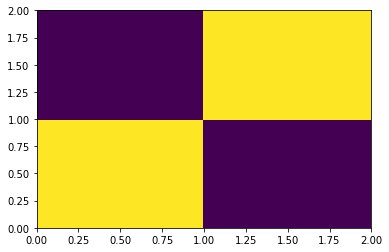

In [37]:
plt.pcolor(df.loc[:,['log_SalePrice','SalePrice']].corr())
plt.show()

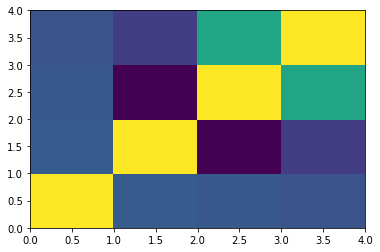

In [38]:
plt.pcolor(df.iloc[:,0:11].corr())
plt.show()

In [39]:
target = 'log_SalePrice'
corr2 = df.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

log_SalePrice    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2  